# 线性回归原理

线性回归是一种统计和机器学习方法，用于建模自变量（特征变量）与因变量（目标变量）之间的线性关系。线性回归分为一元线性回归与多元线性回归

## 一元线性回归

一元线性回归是一种基本的回归分析方法，用于研究一个目标变量（因变量）与一个特征变量（自变量）之间的线性关系。它是线性回归的最简单形式，特别适用于初步分析两个变量间的关系

### 数学表达式

一元线性回归的模型公式为：
$$y = \beta_0 + \beta_1 x + \epsilon$$
其中：
- $y$是因变量（目标变量）。
- $x$是自变量（特征变量）。
- $\beta_0$是截距。
- $\beta_1$是回归系数（斜率），表示$x$每变化一个单位时$y$的变化量。
- $\epsilon$是误差项，表示模型未能解释的部分。

### 目标函数

通过最小化误差平方和来拟合模型，找到最优的回归系数$\beta_0$和$\beta_1$，即：

$$\min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

其中， $\hat{y}_i = \beta_0 + \beta_1 x_i$ 为模型的预测值。

### 假设条件

一元线性回归模型的有效性依赖于以下假设：
- **线性关系假设**：自变量$x$与因变量$y$之间的关系是线性的。
- **独立性假设**：观测数据之间相互独立。
- **误差正态性假设**：误差项$\epsilon$服从正态分布。
- **同方差假设**：误差项的方差不随$x$的值而变化。

### 一元线性回归模型优缺点

#### 一元线性回归模型优点

- **简单易用**：适合分析两个变量之间的线性关系。
- **解释性强**：可以通过回归系数直观了解$x$对$y$的影响

#### 一元线性回归模型缺点

- **对假设敏感**：当假设条件不成立时，模型效果会显著下降。
- **无法捕捉非线性关系**：若$x$与$y$的关系是非线性的，模型会表现较差。
- **易受异常值影响**：异常值与噪声数据会对回归系数的估计造成较大影响。

## 多元线性回归

多元线性回归是一种扩展的线性回归模型，用于分析一个因变量（目标变量）与多个自变量（特征变量）之间的线性关系

### 数学表达式

多元线性回归模型的一般形式为：
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$
其中：
- $y$是因变量（目标变量）。
- $x_1, x_2, \dots, x_p$是自变量（特征变量）。
- $\beta_0$是截距，表示当所有自变量均为零时$y$的取值。
- $\beta_1, \beta_2, \dots, \beta_p$是回归系数，表示每个自变量对因变量的线性影响。
- $\epsilon$是误差项，表示模型未解释的部分。

### 目标函数

多元线性回归通过最小化误差平方和来拟合模型，因此多元线性回归的目标函数为：
$$\min_{\beta} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
其中$\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}$是模型的预测值。

### 假设条件

- **线性关系假设**：因变量和自变量之间存在线性关系。
- **误差独立性假设**：误差项$\epsilon$之间相互独立。
- **误差正态性假设**：误差项服从正态分布。
- **同方差假设**：误差项的方差在不同自变量水平下恒定。
- **无多重共线性假设**：自变量之间不存在高度相关性，否则会导致模型不稳定。

### 多元线性回归模型优缺点

#### 多元线性回归模型优点

- **可以分析多个变量的线性关系**：适合较复杂的现实问题建模。
- **解释性强**：回归系数可以定量描述每个自变量对因变量的影响。

#### 多元线性回归模型缺点

- **对假设敏感**：不满足线性假设时，模型效果会大打折扣。
- **对异常值敏感**：异常值可能显著影响模型系数的估计。
- **多重共线性问题**：如果自变量高度相关，模型可能变得不稳定。
- **无法拟合非线性关系**：当自变量与因变量间为非线性关系时，模型表现较差。

# 线性回归案例

## LinearRegression
  - **fit_intercept**：是否计算截距
  - **n_jobs**：控制并行计算时使用的 CPU 核心数

## 加州住房数据集

**California housing dataset（加州住房数据集）**数据集是一个回归数据集，数据集的目标是根据一系列地区特征（如人口、房间数、收入等）来预测加州地区的住房价格。

- MedHouseVal：住房价格（单位：10万）
- MedInc：家庭收入（单位：万）
- HouseAge：房屋年龄（单位：年）
- AveRooms：平均房间数
- AveBedrms：平均卧室数
- Population：人口
- AveOccup：平均家庭人口
- Latitude：纬度
- Longitude：经度

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
df = fetch_california_housing(as_frame=True).frame # as_frame设置为True确保下载的数据格式为DataFrame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 一元线性回归

回归公式: y = 0.42 * X + 0.44
MSE: 0.73
RMSE: 0.85
R²: 0.45


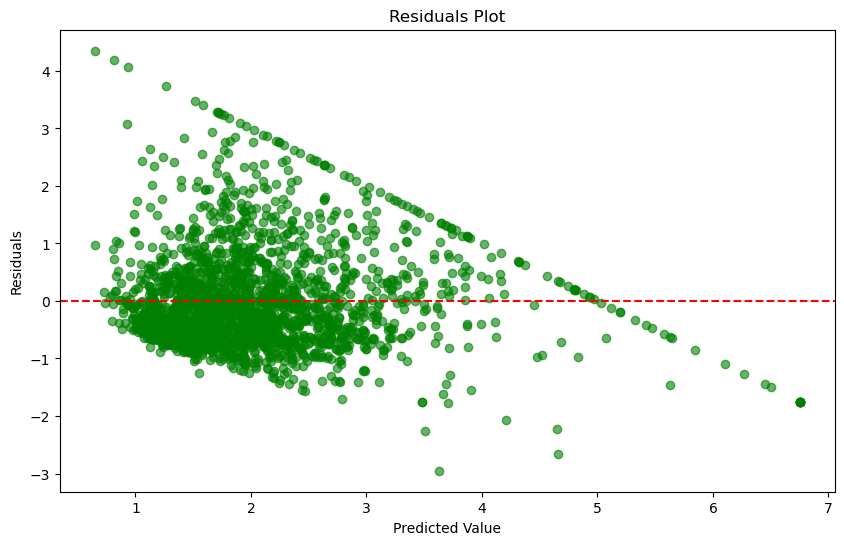

In [2]:
# 'MedInc'（家庭收入中位数）作为自变量，'MedHouseVal'（房屋中位数价值）作为因变量
X = df[['MedInc']]  # 自变量
y = df['MedHouseVal']  # 因变量

# 分割数据集为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression() # 初始化线性回归模型
model.fit(X_train, y_train) # 训练线性回归模型

# 获取回归系数和截距
slope = model.coef_[0]
intercept = model.intercept_

# 输出回归公式
print(f"回归公式: y = {slope:.2f} * X + {intercept:.2f}")

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 输出模型评估指标
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


# 绘制残差图
residuals = y_test - y_pred  # 残差 = 实际值 - 预测值
plt.figure(figsize=(10, 6))  # 设置图表大小（宽10英寸，高6英寸）
# 绘制散点图，横轴为预测值，纵轴为残差
# y_pred: 模型预测的房价中位数
# residuals: 实际值与预测值之间的差异（残差）
plt.scatter(y_pred, residuals, alpha=0.6, color='green')  # alpha=0.6 控制点的透明度，color设置点的颜色为绿色
plt.axhline(0, color='red', linestyle='--')  # 绘制一条红色虚线，表示残差为0的位置
plt.title("Residuals Plot")  # 设置残差图的标题
plt.xlabel("Predicted Value")  # 设置x轴标签
plt.ylabel("Residuals")  # 设置y轴标签
# 显示图表
plt.show()

1. **残差分布不均匀，呈现区间依赖性**  
- **现象**：  
    - 预测值两端（1-2和4-5区间）的残差密集聚集在零线附近（残差绝对值≤1），而中间区域（2-4区间）残差分散（范围-3到+2）。  
- **结论**：  
    - 模型对极端预测值（低/高）的预测稳定性较好，但对中等预测值区间（2-4）的拟合存在显著波动，可能因该区间数据复杂度较高或模型未能捕捉局部特征（如非线性关系、特征交互）。  
2. **系统性偏差集中在中间预测区间**  
- **现象**：  
    - 预测值2-4对应的残差分布明显偏离零线，负残差（-3到0）占比更高，且极端负残差集中在3-5区间。  
- **结论**：  
    - 模型在中等预测值区间**系统性低估真实值**，可能因数据存在未被拟合的二次趋势、交互效应或该区间存在异常分布（如多峰分布、突变点）。  
3. **异方差性显著**  
- **现象**：  
    - 中间预测区间的残差散布范围（-3到+2）远大于两端区间（±1），形成“中间宽、两端窄”的漏斗形分布。  
- **结论**：  
    - **违反同方差假设**，模型误差方差与预测值相关，可能导致统计推断失效（如回归系数的显著性检验偏差）。需优先解决异方差性以提升模型可靠性。  
4. **离群值暴露模型局部缺陷**  
- **现象**：  
    - 预测值3-5区间存在极端负残差（接近-3的离散点）。  
- **结论**：  
    - 局部极端残差可能由**数据噪声**（如测量误差）或**模型局部失效**（如未识别突变特征、缺失关键变量）导致，需针对性检查该区间样本的数据质量或补充特征。  
5. **模型整体表现**  
- **优点**：  
    - 残差在预测值1-5范围内分布相对均匀，无明显全局趋势（如U型或喇叭形），说明模型**基线预测能力可靠**，未出现整体高估/低估。  
- **潜在风险**：  
    - 中间区域（2-4）残差波动范围大（-3到+2），可能因**局部欠拟合**（如模型过于简单）或**特征缺失**（如忽略关键解释变量），需通过引入复杂模型或者特征工程进一步优化。  

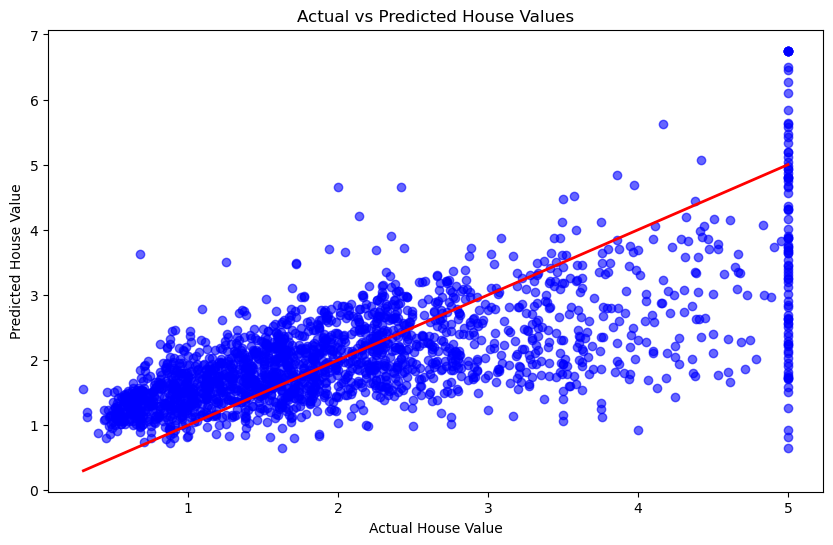

In [6]:
# 绘制实际值 vs 预测值图
plt.figure(figsize=(10, 6))  # 设置图表的大小（宽10英寸，高6英寸）
# 绘制散点图，横轴为实际值，纵轴为预测值
# y_test: 实际的房价中位数
# y_pred: 通过模型预测的房价中位数
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')  # alpha=0.6 控制点的透明度，color设置点的颜色为蓝色
# 绘制一条理想情况下的红色线，表示预测值与实际值应该完全一致的情况
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # x轴最小值到最大值，y轴也从最小值到最大值，这样能显示出理想的对角线
plt.title("Actual vs Predicted House Values")  # 设置图表标题
plt.xlabel("Actual House Value")  # 设置x轴标签
plt.ylabel("Predicted House Value")  # 设置y轴标签
# 显示图表
plt.show()

1. **模型整体拟合能力**  
- **现象**：  
    - 大多数蓝色散点**密集分布在对角线（红色）附近**，尤其在低中值区间（Actual 1-4，Predicted 1-4），表明预测值与实际值接近。  
- **结论**：  
    - 模型**基础拟合能力可靠**，能够捕捉房屋价值的主要变化趋势（如线性关系或低阶非线性模式）。  

2. **高方差区域暴露模型波动性**  
- **现象**：  
    - 部分散点（如Actual 2/Predicted 5、Actual 5/Predicted 2）**严重偏离对角线**，水平或垂直距离较大（预测误差绝对值>3）。  
- **结论**：  
    - 模型对某些样本的预测存在**高方差**（如过拟合噪声或复杂特征未充分学习），导致局部预测结果不稳定。  

3. **系统性偏差评估**  
- **现象**：  
    - 散点在对角线**上下两侧分布相对对称**，未出现密集堆积在单侧的情况（如整体高估或低估）。  
- **结论**：  
    - 模型**无明显全局性偏差**（如未系统性高估高价房或低估低价房），表明模型假设（如线性、非线性项）与数据分布基本匹配。  

4. **异常值识别与影响**  
- **现象**：  
    - 少量点（如Actual 5/Predicted 0.5、Actual 0.5/Predicted 4）**极端偏离对角线**，误差远超主体分布范围。  
- **结论**：  
    - 极端偏离点可能是**数据异常值**（如房屋价值录入错误、特殊属性房型）或**模型局部失效**（如对超高/超低价房缺乏训练数据）。  

5. **高价值区间外推风险**  
- **现象**：  
    - 实际值>4的高价房样本稀疏，且预测值分散（如Actual 5对应Predicted 2-5），部分高价值房预测误差显著（如Actual 5/Predicted 2）。  
- **结论**：  
    - 模型对高价房（Actual>4）的**外推预测不可靠**，可能因训练数据不足或高价房特征模式复杂（如稀缺性、非线性溢价）。  


## 多元线性回归

回归公式: y = -36.72
 + (0.44) * MedInc
 + (0.01) * HouseAge
 + (-0.11) * AveRooms
 + (0.65) * AveBedrms
 + (-0.00) * Population
 + (-0.00) * AveOccup
 + (-0.42) * Latitude
 + (-0.43) * Longitude
MSE: 0.56
RMSE: 0.75
R²: 0.58


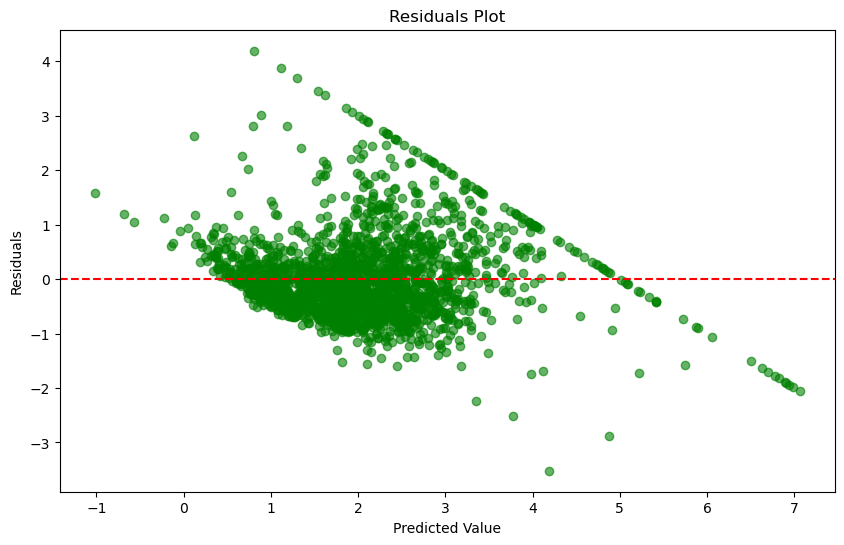

In [7]:
# 选择全部变量进行多元线性回归
# 所有特征作为自变量，除了目标变量 'MedHouseVal'
X = df.drop(columns=['MedHouseVal'])  # 删除目标变量，剩下的都是自变量
y = df['MedHouseVal']  # 因变量：房屋中位数价值

# 分割数据集为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 创建并训练多元线性回归模型
model = LinearRegression() # 初始化线性回归模型
model.fit(X_train, y_train) # 训练线性回归模型

# 获取回归系数和截距
coefficients = model.coef_
intercept = model.intercept_

# 输出回归公式
print("回归公式: y = {:.2f}".format(intercept))
for i, col in enumerate(X.columns):
    print(f" + ({coefficients[i]:.2f}) * {col}")

# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 输出模型评估指标
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 绘制残差图
residuals = y_test - y_pred  # 残差 = 实际值 - 预测值
plt.figure(figsize=(10, 6))  # 设置图表大小（宽10英寸，高6英寸）
# 绘制散点图，横轴为预测值，纵轴为残差
plt.scatter(y_pred, residuals, alpha=0.6, color='green')  # alpha=0.6 控制点的透明度，color设置点的颜色为绿色
plt.axhline(0, color='red', linestyle='--')  # 绘制一条红色虚线，表示残差为0的位置
plt.title("Residuals Plot")  # 设置残差图的标题
plt.xlabel("Predicted Value")  # 设置x轴标签
plt.ylabel("Residuals")  # 设置y轴标签
plt.show()

1. **整体分布特征**  
- **现象**：  
    - 数据点（绿色）**密集聚集在零残差线（红色虚线）附近**，尤其在预测值0-3区间，残差绝对值普遍≤1，表明模型对中低预测值区域的拟合精度较高。  
    - 预测值4-7区间数据点稀疏，但残差范围扩大（如预测值4-6时残差可达±3），且分布相对分散，暗示模型对高预测值的预测稳定性下降。  

- **结论**：  
    - **模型基础性能良好**：中低预测值区间的集中分布验证了模型在数据密集区域的可靠性。  
    - **高预测值外推风险**：预测值>4时数据稀疏，残差波动增大，可能因训练数据在该区间样本不足，导致模型外推能力受限。  

2. **残差随机性与潜在模式**  
- **现象**：  
    - 零线两侧的残差分布**整体随机**，未出现明显U型、喇叭形或分段聚集趋势，符合理想残差图的无规律性要求。  
    - 预测值0-2区间存在少量残差绝对值>2的离散点（如残差≈-3和+3），但未形成集群；预测值1-3区间残差正负分布对称（范围-3到+3）。  

- **结论**：  
    - **无全局系统性偏差**：随机分布表明模型未遗漏关键全局特征（如线性关系、主效应）。  
    - **局部噪声或数据稀疏性**：离散点可能是数据噪声或高预测值区间样本量不足导致的偶然波动，需结合业务背景判断是否需清洗或补充数据。  
3. **异方差性排查**  
- **现象**：  
    - 低预测值区（0-3）残差密集且范围窄（±1），高预测值区（4-7）残差分散且范围宽（±3），但**无明确漏斗形或单调变化趋势**（如中间区域未呈现规律性扩散）。  
    - 预测值3-4区间残差分布均匀过渡，未出现突变性离散。  

- **结论**：  
    - **轻度异方差性**：残差方差随预测值增大而缓慢上升，但未达到显著破坏模型假设的程度（可通过Breusch-Pagan检验量化）。  
    - **外推区间主导误差**：预测值>4的误差扩大主要由数据稀疏性引起，而非严格意义上的异方差性，需优先扩充高预测值样本。  

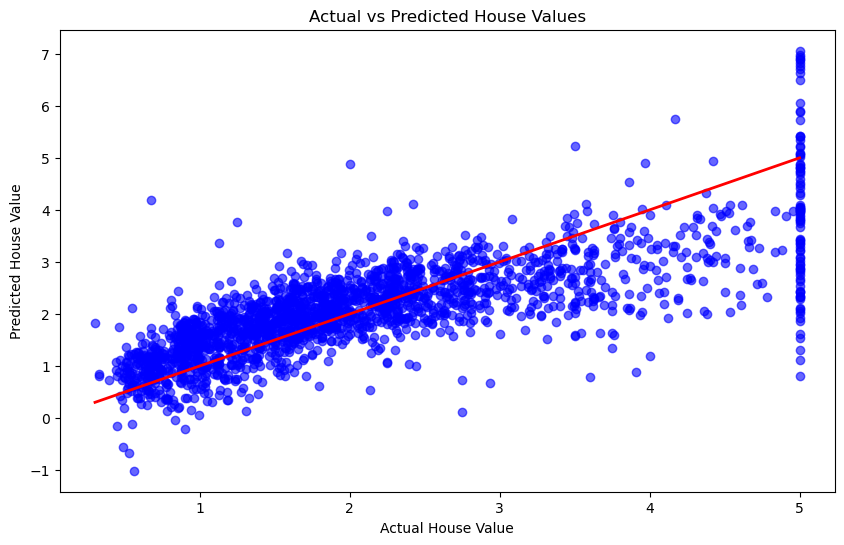

In [8]:
# 绘制实际值 vs 预测值图
plt.figure(figsize=(10, 6))  # 设置图表的大小（宽10英寸，高6英寸）
# 绘制散点图，横轴为实际值，纵轴为预测值
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')  # alpha=0.6 控制点的透明度，color设置点的颜色为蓝色
# 绘制一条理想情况下的红色线，表示预测值与实际值应该完全一致的情况
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # x轴最小值到最大值，y轴也从最小值到最大值
plt.title("Actual vs Predicted House Values")  # 设置图表标题
plt.xlabel("Actual House Value")  # 设置x轴标签
plt.ylabel("Predicted House Value")  # 设置y轴标签
plt.show()

1. **模型基础性能可靠**  
- **现象**：  
    - 大部分蓝色散点**密集分布在对角线（红色直线）附近**，尤其在实际值1-4区间，预测值集中在1-5范围内，表明模型对中低价值房屋的预测与实际值基本一致。  
- **结论**：  
    - 模型成功捕捉了房屋价值的主要规律（如面积、地段等核心特征的影响），满足**基础预测需求**，适用于常规房屋估价场景。  

2. **高价房外推能力不足**  
- **现象**：  
    - **实际值5的高价房**预测值分散在1-7区间（纵轴跨度达6个单位），部分点偏离对角线较远（如Actual=5时Predicted=2）。  
    - 预测值范围延伸至7（远超实际值上限5），暗示模型对部分高价房存在**严重高估**（如Actual=3时Predicted=7）。  
- **结论**：  
    - 高价房（Actual=5）预测不稳定，可能因训练数据中高价样本稀疏或特征未充分表达稀缺性（如学区、景观等隐性价值）。  
    - 预测值超过实际值上限（如Predicted=7）反映模型**外推风险**，可能因复杂特征（如异常面积/楼层）未被合理约束。  

3. **局部高方差与异常值**  
- **现象**：  
    - 实际值1-4区间存在**离散点**（如Actual=1/Predicted=4、Actual=0.5/Predicted=-1），误差远超主体分布范围。  
    - 预测值在纵轴覆盖-1到7，远宽于实际值范围（1-5），表明模型对部分样本产生**不合理预测**。  
- **结论**：  
    - 极端偏离点可能是**数据噪声**（如录入错误、特殊房型）或**模型过拟合**（如对异常特征赋予过高权重）。  
    - 负值预测值（Predicted=-1）违背业务逻辑（房屋价值不应为负），需检查特征工程或模型约束条件。  

4. **系统性偏差不显著**  
- **现象**：  
    - 散点在对角线上下**对称分布**，未出现密集堆积在单侧的情况（如整体高估或低估）。  
    - 实际值1-4区间的预测值围绕对角线随机散布，无明显方向性偏移。  
- **结论**：  
    - 模型**未引入全局性偏差**，表明特征与目标变量的关系假设基本合理（如线性或低阶非线性关系）。  

5. **高价值区间误差方向分析**  
- **现象**：  
    - 实际值5的预测值分布中，部分点低于对角线（如Predicted=2），部分点接近对角线（如Predicted=5），但无显著单侧偏离趋势。  
- **结论**：  
    - 高价房预测误差方向不统一，说明模型在该区间的误差**缺乏一致性规律**，可能因数据稀疏性或特征复杂性导致拟合不稳定。  